In [1]:
import os
import torch
from torch.utils.data import random_split
import torchio as tio
from pathlib import Path
import importlib
from utils import validate_segmentation, plot_prediction, dice_score


import torchio_utils
importlib.reload(torchio_utils)
from torchio_utils import torchio_compose_train, plot_example


#check if colab is being used
if os.path.exists('/content'):
    print('Running on CoLab')
    from google.colab import drive
    drive.mount('/content/drive')
    torch.cuda.empty_cache()

path_to_mask = 'data/patients/labels/'
path_to_imgs = 'data/patients/imgs/'
path_to_controls = 'data/controls/imgs/' #healthy individuals (no tumors)
dataset_path = 'data.zip'
dataset_dir_name = 'data'
dataset_dir = Path(dataset_dir_name)

if not dataset_dir.is_dir():
    !curl --silent --output {dataset_path} --location {dataset_url} 
    !unzip -qq {dataset_path}
!tree -d {dataset_dir_name}

data
├── controls
│   └── imgs
└── patients
    ├── imgs
    └── labels

5 directories


Found 182 subjects


  0%|          | 0/181 [00:00<?, ?it/s]

Landmarks: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 4.33322500e-02 6.22397969e-01 9.23236779e+00
 1.72545437e+01 2.07381415e+01 2.53002322e+01 4.03121636e+01
 1.00000000e+02]


 61%|██████    | 11/18 [00:04<00:03,  2.10it/s]/home/asp/anaconda3/lib/python3.11/site-packages/torchio/transforms/transform.py:163: RuntimeWarning: Input image is 2D, but "2" is in axes: (0, 1, 2)
  transformed = self.apply_transform(subject)
100%|██████████| 18/18 [00:08<00:00,  2.16it/s]


Subject(Keys: ('img', 'label'); images: 2)
ScalarImage(shape: (4, 400, 991, 1); spacing: (1.00, 1.00, 1.00); orientation: LPS+; dtype: torch.FloatTensor; memory: 6.0 MiB)
torch.Size([4, 400, 991, 1])


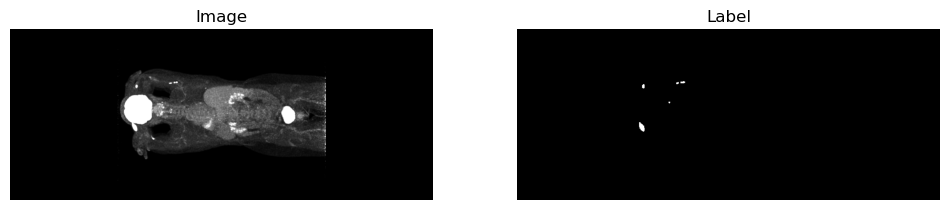

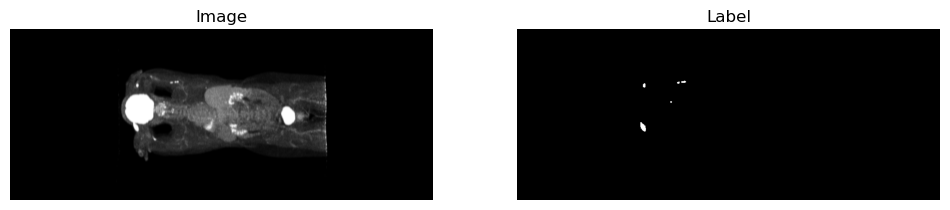

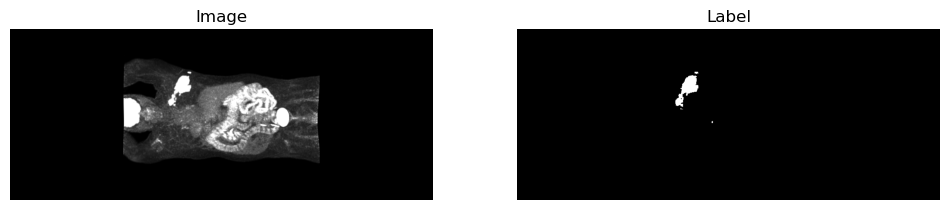

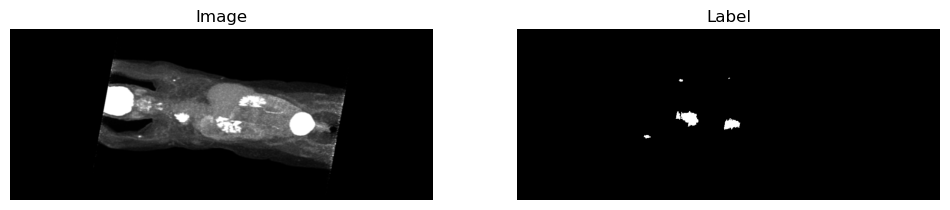

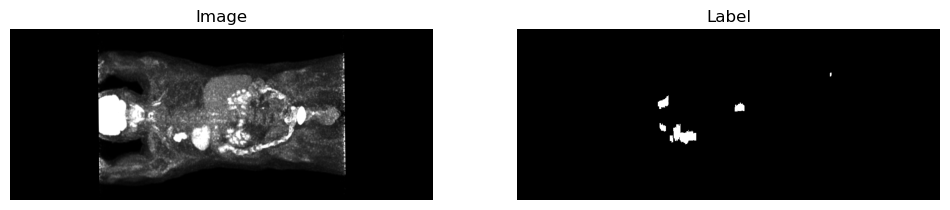

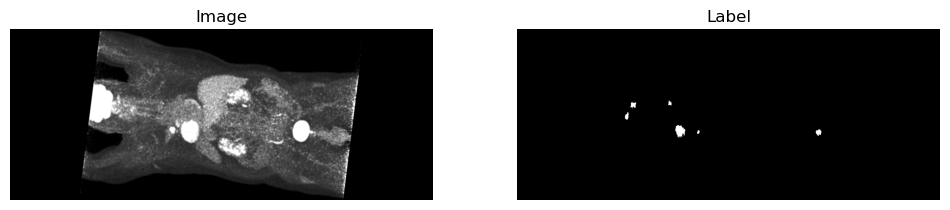

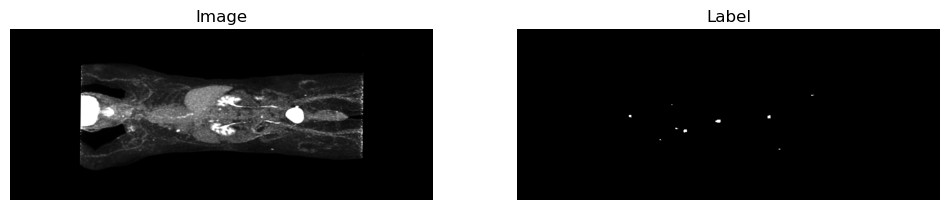

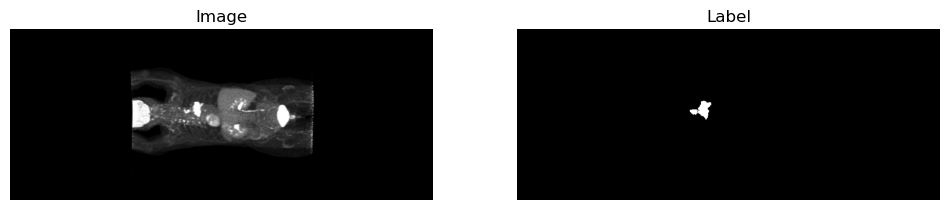

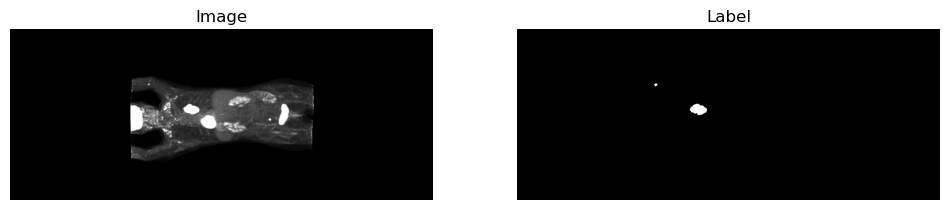

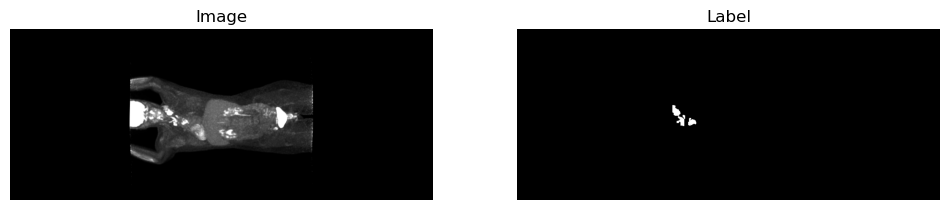

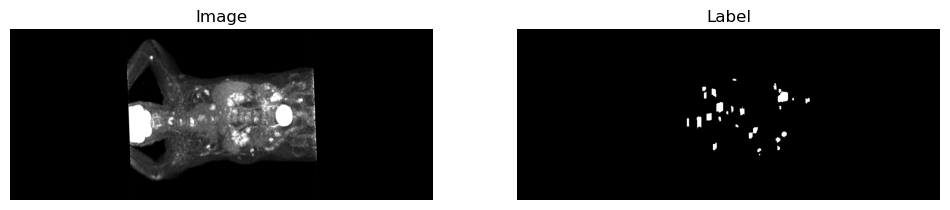

In [2]:
images_dir = dataset_dir / 'patients/imgs'
labels_dir = dataset_dir / 'patients/labels'
controls_dir = dataset_dir / 'controls/imgs'
image_paths = sorted(images_dir.glob('*.png'))
label_paths = sorted(labels_dir.glob('*.png'))
control_paths = sorted(controls_dir.glob('*.png'))

dataset = torchio_compose_train(image_paths, label_paths, control_paths, 
                                cropsize=(400,991), train_size = 200,
                                save_training_dataset = True)
print(dataset[0])
print(dataset[0].img)
print(dataset[0].img[tio.DATA].shape)

one_subject = dataset[0]
image_array = one_subject.img[tio.DATA].squeeze().numpy()
label_array = one_subject.label[tio.DATA].squeeze().numpy()

slice_idx = image_array.shape[0] // 2
image_slice = image_array[slice_idx, :, :]
label_slice = label_array[slice_idx, :, :]

plot_example(image_slice, label_slice)

for i in range(10):
    one_subject = dataset[182+i]
    image_array = one_subject.img[tio.DATA].squeeze().numpy()
    label_array = one_subject.label[tio.DATA].squeeze().numpy()

    slice_idx = image_array.shape[0] // 2
    image_slice = image_array[slice_idx, :, :]
    label_slice = label_array[slice_idx, :, :]

    plot_example(image_slice, label_slice)
